# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
!pip install citipy


In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
cities
cities_df= pd.DataFrame(cities)
cities_df

cities_df['Lat']= ''
cities_df['Long']= ''
cities_df['Max Temperature']= ''
cities_df['Humidity']= ''
cities_df['Cloudiness %']= ''
cities_df['Wind Speed']= ''
cities_df["Country"]= ''
cities_df["Date"]= ''

cities_df.rename(columns= {0 : "City"}, inplace=True)
cities_df

,City,Lat,Long,Max Temperature,Humidity,Cloudiness %,Wind Speed,Country,Date
0,linchuan,,,,,,,,
1,albany,,,,,,,,
2,safranbolu,,,,,,,,
3,cherskiy,,,,,,,,
4,ushuaia,,,,,,,,
...,...,...,...,...,...,...,...,...,...
612,sinnar,,,,,,,,
613,sikandra rao,,,,,,,,
614,odweyne,,,,,,,,
615,esna,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units= "Imperial"
url = 'https://api.openweathermap.org/data/2.5/weather?'
for index, row in cities_df.iterrows():
    url = 'https://api.openweathermap.org/data/2.5/weather?'
    city= row['City']
    response= requests.get(url + "&appid="+ weather_api_key + "&q="+ city+ "&units="+ units)
    response= response.json()
    try:
        #print(f'{city} has been added to your DataFrame')
        cities_df.loc[index, "Lat"]= response["coord"]["lat"]
        cities_df.loc[index, "Long"]= response["coord"]["lon"]
        cities_df.loc[index, "Max Temperature"]= response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness %"]= response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"]= response["wind"]["speed"]
        cities_df.loc[index, "Country"]= response["sys"]["country"]
        cities_df.loc[index, "Date"]= response["dt"]
        
        
    except(KeyError, IndexError):
        print("Missing city........skipping")
        
    

Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city........skipping
Missing city..

In [5]:
cities_df

,City,Lat,Long,Max Temperature,Humidity,Cloudiness %,Wind Speed,Country,Date
0,linchuan,,,,,,,,
1,albany,42.6,-73.97,82,37,6,2.48,US,1590171863
2,safranbolu,41.25,32.69,41.31,85,11,2.62,TR,1590172546
3,cherskiy,68.75,161.3,28.67,95,88,15.5,RU,1590172157
4,ushuaia,-54.8,-68.3,53.6,37,75,13.87,AR,1590172035
...,...,...,...,...,...,...,...,...,...
612,sinnar,13.57,33.57,94.14,34,67,14.58,SD,1590172650
613,sikandra rao,27.7,78.4,95.25,12,3,6.38,IN,1590172650
614,odweyne,9.41,45.06,79.97,52,34,13.96,SO,1590172651
615,esna,25.29,32.55,104,21,0,16.96,EG,1590172651


In [17]:
cities_full= cities_df.replace('', np.nan)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:

clean_df= cities_full.dropna(axis=0)



In [19]:
clean_df

,City,Lat,Long,Max Temperature,Humidity,Cloudiness %,Wind Speed,Country,Date
1,albany,42.60,-73.97,82.00,37.0,6.0,2.48,US,1.590172e+09
2,safranbolu,41.25,32.69,41.31,85.0,11.0,2.62,TR,1.590173e+09
3,cherskiy,68.75,161.30,28.67,95.0,88.0,15.50,RU,1.590172e+09
4,ushuaia,-54.80,-68.30,53.60,37.0,75.0,13.87,AR,1.590172e+09
5,hobart,-42.88,147.33,39.99,93.0,0.0,8.05,AU,1.590172e+09
...,...,...,...,...,...,...,...,...,...
612,sinnar,13.57,33.57,94.14,34.0,67.0,14.58,SD,1.590173e+09
613,sikandra rao,27.70,78.40,95.25,12.0,3.0,6.38,IN,1.590173e+09
614,odweyne,9.41,45.06,79.97,52.0,34.0,13.96,SO,1.590173e+09
615,esna,25.29,32.55,104.00,21.0,0.0,16.96,EG,1.590173e+09


In [21]:
clean_df.to_csv("cleaned_final.csv")
clean_df

,City,Lat,Long,Max Temperature,Humidity,Cloudiness %,Wind Speed,Country,Date
1,albany,42.60,-73.97,82.00,37.0,6.0,2.48,US,1.590172e+09
2,safranbolu,41.25,32.69,41.31,85.0,11.0,2.62,TR,1.590173e+09
3,cherskiy,68.75,161.30,28.67,95.0,88.0,15.50,RU,1.590172e+09
4,ushuaia,-54.80,-68.30,53.60,37.0,75.0,13.87,AR,1.590172e+09
5,hobart,-42.88,147.33,39.99,93.0,0.0,8.05,AU,1.590172e+09
...,...,...,...,...,...,...,...,...,...
612,sinnar,13.57,33.57,94.14,34.0,67.0,14.58,SD,1.590173e+09
613,sikandra rao,27.70,78.40,95.25,12.0,3.0,6.38,IN,1.590173e+09
614,odweyne,9.41,45.06,79.97,52.0,34.0,13.96,SO,1.590173e+09
615,esna,25.29,32.55,104.00,21.0,0.0,16.96,EG,1.590173e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
clean_df.describe()

,Lat,Long,Max Temperature,Humidity,Cloudiness %,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.487983,16.739548,66.827565,67.266087,50.617391,9.033617,1.590172e+09
std,32.818981,92.131861,16.991740,22.086553,40.081533,5.738117,2.066985e+02
min,-54.800000,-179.170000,20.480000,3.000000,0.000000,0.400000,1.590172e+09
25%,-8.470000,-67.055000,55.000000,54.000000,5.000000,4.515000,1.590172e+09
50%,22.300000,20.390000,68.500000,74.000000,45.000000,8.050000,1.590173e+09
75%,46.440000,100.345000,80.270000,83.000000,90.000000,12.750000,1.590173e+09
max,78.220000,179.320000,111.200000,100.000000,100.000000,28.860000,1.590173e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.
weather_df= clean_df.loc[clean_df['Humidity']< 100]
weather_df.to_csv("weather_for_import.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

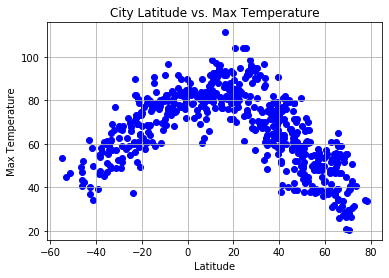

In [24]:
x = weather_df["Lat"]
y= weather_df["Max Temperature"]

plt.scatter(x,y, facecolors= "blue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(b=True)

## Latitude vs. Humidity Plot

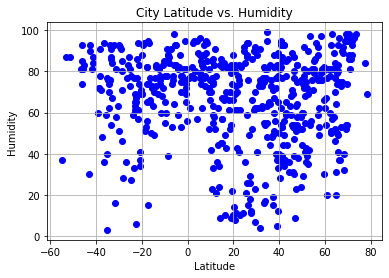

In [25]:
x = weather_df["Lat"]
y= weather_df["Humidity"]

plt.scatter(x,y, facecolors= "blue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True)

## Latitude vs. Cloudiness Plot

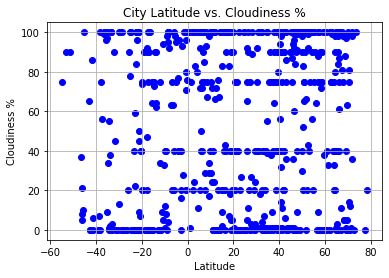

In [28]:
x = weather_df["Lat"]
y= weather_df["Cloudiness %"]

plt.scatter(x,y, facecolors= "blue")
plt.title("City Latitude vs. Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(b=True)

## Latitude vs. Wind Speed Plot

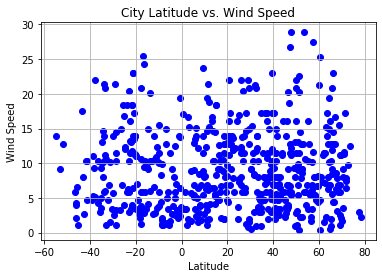

In [29]:
x = weather_df["Lat"]
y= weather_df["Wind Speed"]

plt.scatter(x,y, facecolors= "blue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True)

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots

In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern= clean_df.loc[clean_df["Lat"]>= 0]
southern= clean_df.loc[clean_df["Lat"] < 0]
northern
southern

,City,Lat,Long,Max Temperature,Humidity,Cloudiness %,Wind Speed,Country,Date
4,ushuaia,-54.80,-68.30,53.60,37.0,75.0,13.87,AR,1.590172e+09
5,hobart,-42.88,147.33,39.99,93.0,0.0,8.05,AU,1.590172e+09
6,isangel,-19.55,169.27,62.60,93.0,20.0,6.96,VU,1.590172e+09
8,punta arenas,-53.15,-70.92,44.60,87.0,90.0,9.17,CL,1.590172e+09
9,calvinia,-31.47,19.78,57.18,58.0,0.0,1.52,ZA,1.590173e+09
...,...,...,...,...,...,...,...,...,...
598,upington,-28.45,21.26,68.00,28.0,0.0,1.12,ZA,1.590173e+09
601,sao joao da barra,-21.64,-41.05,80.60,61.0,0.0,18.34,BR,1.590172e+09
603,tuatapere,-46.13,167.68,43.38,85.0,5.0,4.23,NZ,1.590172e+09
605,tutoia,-2.76,-42.27,83.70,75.0,16.0,12.53,BR,1.590173e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

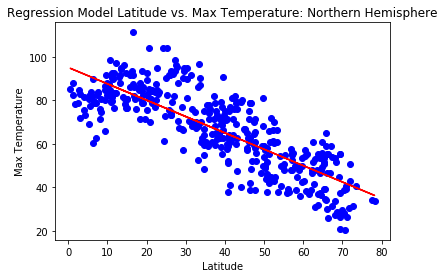

In [45]:
from scipy import stats
import scipy.stats as st
x= northern["Lat"]
y= northern["Max Temperature"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'blue')
plt.plot(x, line, color= "r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Regression Model Latitude vs. Max Temperature: Northern Hemisphere')
cor
plt.savefig('NH_Graph_1')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

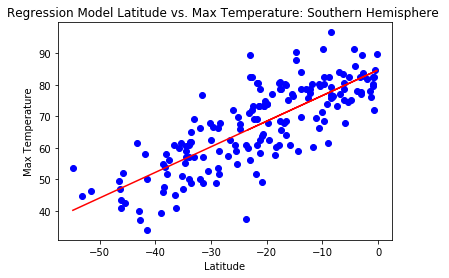

In [46]:
x= southern["Lat"]
y= southern["Max Temperature"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'blue')
plt.plot(x, line, color= "r")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Regression Model Latitude vs. Max Temperature: Southern Hemisphere ')
cor
plt.savefig('SH_Graph_1')

In [ ]:
# We can see here that there is a strong correlaition between max temperature and distance from the equator (shown by latitude). 
#As we would expect, the closer to the equator, the higher max temperature, thus the clustering of more data points near the regression lines. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

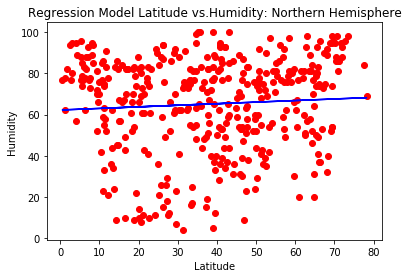

In [47]:
x= northern["Lat"]
y= northern["Humidity"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'red')
plt.plot(x, line, color= "b")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Regression Model Latitude vs.Humidity: Northern Hemisphere')
cor
plt.savefig('NH_Graph_2')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

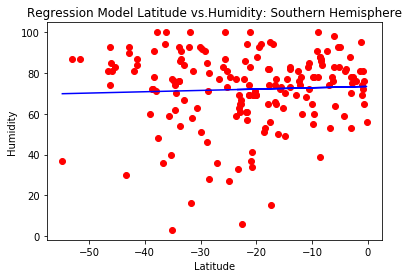

In [48]:
x= southern["Lat"]
y= southern["Humidity"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'red')
plt.plot(x, line, color= "b")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Regression Model Latitude vs.Humidity: Southern Hemisphere')
cor
plt.savefig('SH_Graph_2')

In [ ]:
# These humidity graphs (shown in contrast to the latitude of certain locatins) doesn't make it easy to draw conclusions between northenr and souther hemispheric data.
# Again, we can see slight clustering near the equator, as those are normally warmer and in some cases more humid climates. Bu tere are compounding variables
# for humidity that perhas make this visualization sub optimal for purposes of gaining meaningful insight into trends. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

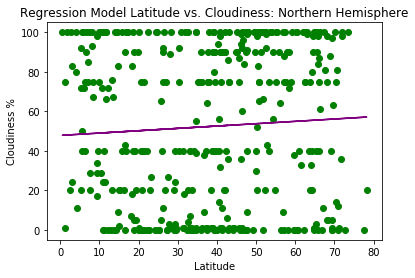

In [49]:
x= northern["Lat"]
y= northern["Cloudiness %"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'green')
plt.plot(x, line, color= "purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Regression Model Latitude vs. Cloudiness: Northern Hemisphere')
cor
plt.savefig('NH_Graph_3')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

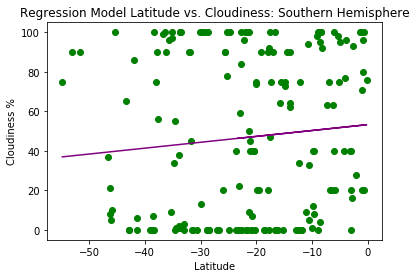

In [50]:
x= southern["Lat"]
y= southern["Cloudiness %"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'green')
plt.plot(x, line, color= "purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Regression Model Latitude vs. Cloudiness: Southern Hemisphere')
cor
plt.savefig('SH_Graph_3')

In [ ]:
# We had more of our random samples fall into the northern hemosphere category.
# This explains the difference in the density when comparing these two graphs. 
# Latitude actually is not a pre derterminant of cloudiness, which is wy weak see a weak relationship in the graph and also in the regression/correlation stats. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

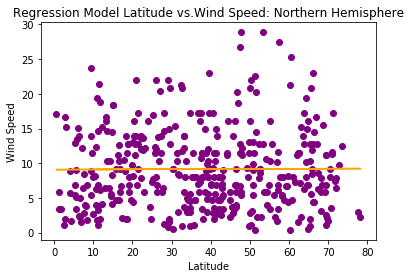

In [51]:
x= northern["Lat"]
y= northern["Wind Speed"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'purple')
plt.plot(x, line, color= "orange")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Regression Model Latitude vs.Wind Speed: Northern Hemisphere')
cor
plt.savefig('NH_Graph_4')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

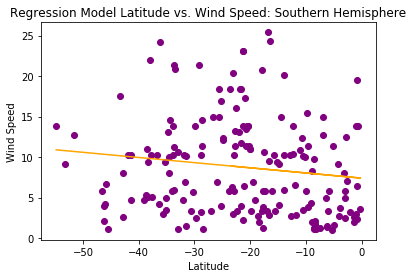

In [52]:
x= southern["Lat"]
y= southern["Wind Speed"]

(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)

plt.scatter(x, y, facecolors= 'purple')
plt.plot(x, line, color= "orange")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Regression Model Latitude vs. Wind Speed: Southern Hemisphere')
cor
plt.savefig('SH_Graph_4')

In [ ]:
# There seems to not be as big of a correlation between latitude and wind speed in the Northern Hemisphere, when compared with the Southern.
# This is shown in the plot below as there is a very flat regression line and the spread od datapoints seems quite random, not holding a discernable pattern.
# It seems in the Southern Hemisphere that the closer you get to the equator, the less variability in wind speed is expected.
# You can see clearly that the chance for a wind speed of above 25 is much more likely in latitudes further away from the equator. 